# Prediction of Heat in district heating system using different Machine Learning algorithms and checking their accuracy:


### General steps for designing the Machine Learning Models:
* Step - 1: Import Libraries.
* Step - 2: Upload the Dataset
* Step - 3: Pre-Processing of the Data
    * Step - 3a : Checking Details of the Data
    * Step - 3b : Checking Missing Values
    * Step - 3c : Checking Null Values
    * Step - 3d : Deleting space from the first column
    * Step - 3e : Checking Duplicate Values
    * Step - 3f : Dropping Duplicate Values
    * Step - 3g : Description of Data
    * Step - 3h : Converting 'Date/Time' to 'Timestamp'
* Step - 4: Data Visualization
    * Step - 4a : Graphs of all parameters
    * Step - 4b : Checking Correlation of the parameters
    * Step - 4c : Correlation Visualization
    * Step - 4d : Dropping less Correlated Values
* Step - 5: Train -Test splitting of the Data
    * Step - 5a : Split the dataset into features and targets 
    * Step - 5b : Checking the shapes of Train and Test Datasets 
* Step - 6: Applying Machine Learning Models
    * Step - 6a : Define the model Architecture
    * Step - 6b : Fit the model
    * Step - 6c : Find the Accuracy
    * Step - 6d : Compute the Error
    * Step - 6e : Make Dataframe of Actual Targets and Predicted Targets
    * Step - 6f : Convert 'Timestamp' into 'Date/Time'
    * Step - 6g : Plot the Graph of Actual Targets v/s Predicted Targets



## Step 1: Importing necessary files for model prediction


In [27]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import sklearn.model_selection as ms
import sklearn.linear_model as lm
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
from keras.regularizers import l2
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

## Step 2: Upload dataset as csv file

In [28]:
# Importing data as csv file:
Data = pd.read_csv("C:/Users/Lenovo/Desktop/HeatAlgorithms/Machine Learning Algorithms/HeatDemand(1745).csv")

In [29]:
print(Data)

              Date/Time  Outdoor Temperature  Solar Radiation Rate per Area  \
0       01/01  00:15:00               7.2725                            0.0   
1       01/01  00:30:00               6.0650                            0.0   
2       01/01  00:45:00               4.8575                            0.0   
3       01/01  01:00:00               3.6500                            0.0   
4       01/01  01:15:00               3.8375                            0.0   
...                 ...                  ...                            ...   
70074   12/31  23:00:00               2.1400                            0.0   
70075   12/31  23:15:00               2.3300                            0.0   
70076   12/31  23:30:00               2.5200                            0.0   
70077   12/31  23:45:00               2.7100                            0.0   
70078   12/31  24:00:00               2.9000                            0.0   

       Direct Solar Radiation Rate per Area  Occupa

## Step 3:Pre - processing of the data:

In [30]:
#Details of the data:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70079 entries, 0 to 70078
Data columns (total 11 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Date/Time                                       70079 non-null  object 
 1   Outdoor Temperature                             70079 non-null  float64
 2   Solar Radiation Rate per Area                   70079 non-null  float64
 3   Direct Solar Radiation Rate per Area            70079 non-null  float64
 4   Occupant Count                                  70079 non-null  float64
 5   People Sensible Heating Rate                    70079 non-null  float64
 6   Windows Total Transmitted Solar Radiation Rate  70079 non-null  float64
 7   Hot Water Energy                                70079 non-null  float64
 8   Hot Water Rate                                  70079 non-null  float64
 9   Inlet Temperature                      

In [31]:
# Checking are there any missing values:
Data.isna().sum()

Date/Time                                         0
Outdoor Temperature                               0
Solar Radiation Rate per Area                     0
Direct Solar Radiation Rate per Area              0
Occupant Count                                    0
People Sensible Heating Rate                      0
Windows Total Transmitted Solar Radiation Rate    0
Hot Water Energy                                  0
Hot Water Rate                                    0
Inlet Temperature                                 0
class                                             0
dtype: int64

In [32]:
# Checking are there any null values:
Data.isnull().sum()

Date/Time                                         0
Outdoor Temperature                               0
Solar Radiation Rate per Area                     0
Direct Solar Radiation Rate per Area              0
Occupant Count                                    0
People Sensible Heating Rate                      0
Windows Total Transmitted Solar Radiation Rate    0
Hot Water Energy                                  0
Hot Water Rate                                    0
Inlet Temperature                                 0
class                                             0
dtype: int64

In [33]:
# Deleting any empty spaces from the first column:
Data['Date/Time'] = Data['Date/Time'].str.strip()

In [34]:
# Checking are there any duplicate values:
duplicates = Data.pivot_table(index = ['Date/Time', 'Outdoor Temperature', 
                                       'Solar Radiation Rate per Area', 
                                       'Direct Solar Radiation Rate per Area', 
                                       'Occupant Count', 
                                       'People Sensible Heating Rate',
                                       'Windows Total Transmitted Solar Radiation Rate',
                                       'Hot Water Energy', 
                                       'Hot Water Rate', 
                                       'Inlet Temperature' , 
                                       'class'], aggfunc = 'size' )
print(duplicates)

Date/Time        Outdoor Temperature  Solar Radiation Rate per Area  Direct Solar Radiation Rate per Area  Occupant Count  People Sensible Heating Rate  Windows Total Transmitted Solar Radiation Rate  Hot Water Energy  Hot Water Rate  Inlet Temperature  class
01/01  00:15:00  7.2725               0.0                            0.0                                   1.0             80.912482                     0.0                                             500406.3132       556.007015      50                 50       2
01/01  00:30:00  6.0650               0.0                            0.0                                   1.0             79.740535                     0.0                                             474024.5772       526.693975      52                 50       2
01/01  00:45:00  4.8575               0.0                            0.0                                   1.0             78.220023                     0.0                                             365448.87

In [35]:
# Removing duplicate values:
Data = Data.drop_duplicates()
Data

,Date/Time,Outdoor Temperature,Solar Radiation Rate per Area,Direct Solar Radiation Rate per Area,Occupant Count,People Sensible Heating Rate,Windows Total Transmitted Solar Radiation Rate,Hot Water Energy,Hot Water Rate,Inlet Temperature,class
0,01/01 00:15:00,7.2725,0.0,0.0,1.0,80.912482,0.0,500406.3132,556.007015,50,50
1,01/01 00:30:00,6.0650,0.0,0.0,1.0,79.740535,0.0,474024.5772,526.693975,52,50
2,01/01 00:45:00,4.8575,0.0,0.0,1.0,78.220023,0.0,365448.8766,406.054307,56,50
3,01/01 01:00:00,3.6500,0.0,0.0,1.0,77.895519,0.0,276488.1718,307.209080,59,50
4,01/01 01:15:00,3.8375,0.0,0.0,1.0,77.618478,0.0,224995.4725,249.994969,61,61
...,...,...,...,...,...,...,...,...,...,...,...
35035,12/31 23:00:00,2.1400,0.0,0.0,1.0,76.923458,0.0,238868.6237,265.409582,61,61
35036,12/31 23:15:00,2.3300,0.0,0.0,1.0,77.053991,0.0,239238.6102,265.820678,61,61
35037,12/31 23:30:00,2.5200,0.0,0.0,1.0,77.006378,0.0,238473.8181,264.970909,61,61
35038,12/31 23:45:00,2.7100,0.0,0.0,1.0,76.806447,0.0,236891.7890,263.213099,61,61


In [36]:
Data = Data.rename(index={70078:35039})
Data

,Date/Time,Outdoor Temperature,Solar Radiation Rate per Area,Direct Solar Radiation Rate per Area,Occupant Count,People Sensible Heating Rate,Windows Total Transmitted Solar Radiation Rate,Hot Water Energy,Hot Water Rate,Inlet Temperature,class
0,01/01 00:15:00,7.2725,0.0,0.0,1.0,80.912482,0.0,500406.3132,556.007015,50,50
1,01/01 00:30:00,6.0650,0.0,0.0,1.0,79.740535,0.0,474024.5772,526.693975,52,50
2,01/01 00:45:00,4.8575,0.0,0.0,1.0,78.220023,0.0,365448.8766,406.054307,56,50
3,01/01 01:00:00,3.6500,0.0,0.0,1.0,77.895519,0.0,276488.1718,307.209080,59,50
4,01/01 01:15:00,3.8375,0.0,0.0,1.0,77.618478,0.0,224995.4725,249.994969,61,61
...,...,...,...,...,...,...,...,...,...,...,...
35035,12/31 23:00:00,2.1400,0.0,0.0,1.0,76.923458,0.0,238868.6237,265.409582,61,61
35036,12/31 23:15:00,2.3300,0.0,0.0,1.0,77.053991,0.0,239238.6102,265.820678,61,61
35037,12/31 23:30:00,2.5200,0.0,0.0,1.0,77.006378,0.0,238473.8181,264.970909,61,61
35038,12/31 23:45:00,2.7100,0.0,0.0,1.0,76.806447,0.0,236891.7890,263.213099,61,61


In [37]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Date/Time                                       35040 non-null  object 
 1   Outdoor Temperature                             35040 non-null  float64
 2   Solar Radiation Rate per Area                   35040 non-null  float64
 3   Direct Solar Radiation Rate per Area            35040 non-null  float64
 4   Occupant Count                                  35040 non-null  float64
 5   People Sensible Heating Rate                    35040 non-null  float64
 6   Windows Total Transmitted Solar Radiation Rate  35040 non-null  float64
 7   Hot Water Energy                                35040 non-null  float64
 8   Hot Water Rate                                  35040 non-null  float64
 9   Inlet Temperature                      

In [38]:
# Description of data:
Data.describe()

,Outdoor Temperature,Solar Radiation Rate per Area,Direct Solar Radiation Rate per Area,Occupant Count,People Sensible Heating Rate,Windows Total Transmitted Solar Radiation Rate,Hot Water Energy,Hot Water Rate,Inlet Temperature,class
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,9.778301,63.357807,97.279060,0.763271,57.325211,166.530989,117700.933834,130.778815,65.390325,65.292180
std,5.934779,94.357632,202.503056,0.312582,23.926332,292.197910,74412.773591,82.680860,2.873735,3.225421
min,-4.230000,0.000000,0.000000,0.000000,0.000000,0.000000,15945.175030,17.716861,50.000000,50.000000
25%,5.410000,0.000000,0.000000,0.500000,38.504211,0.000000,40190.017363,44.655575,63.000000,63.000000
50%,9.320000,0.000000,0.000000,1.000000,71.897686,0.000000,118932.918500,132.147687,65.000000,65.000000
75%,13.940000,104.000000,61.310000,1.000000,77.013944,215.069063,177189.416000,196.877129,68.000000,68.000000
max,26.630000,440.000000,973.610000,1.000000,83.309758,1794.118158,500406.313200,556.007015,69.000000,69.000000


In [41]:
# Splitting 'Date/Time' column just for convert it in Timestamp:
for i in range(len(Data['Date/Time'])):
    month_day, hour_mins_secs = Data['Date/Time'][i].split(' ',1)
    month, day = month_day.split('/')
    hour,mins,secs = hour_mins_secs.split(':')
    hour = hour.lstrip()
    if hour == '24':
        Data['Date/Time'][i] = f'{month}/{day} 00:{mins}:{secs}'

In [42]:
# convert the date/time column to a timestamp
Data['Timestamp'] = pd.to_datetime(Data['Date/Time'], format='%m/%d %H:%M:%S')
Data['Timestamp']

0       1900-01-01 00:15:00
1       1900-01-01 00:30:00
2       1900-01-01 00:45:00
3       1900-01-01 01:00:00
4       1900-01-01 01:15:00
                ...        
35035   1900-12-31 23:00:00
35036   1900-12-31 23:15:00
35037   1900-12-31 23:30:00
35038   1900-12-31 23:45:00
35039   1900-12-31 00:00:00
Name: Timestamp, Length: 35040, dtype: datetime64[ns]

In [43]:
Data['Timestamp'] = (Data['Timestamp'] - pd.Timestamp("1900-01-01")) // pd.Timedelta('1m')
Data['Timestamp']

0            15
1            30
2            45
3            60
4            75
          ...  
35035    525540
35036    525555
35037    525570
35038    525585
35039    524160
Name: Timestamp, Length: 35040, dtype: int64

In [44]:
for i in range(96,len(Data['Timestamp'])+1,96):
    Data['Timestamp'][i-1] = Data['Timestamp'][i-2] + 15

Data['Timestamp']

0            15
1            30
2            45
3            60
4            75
          ...  
35035    525540
35036    525555
35037    525570
35038    525585
35039    525600
Name: Timestamp, Length: 35040, dtype: int64

In [45]:
Data

,Date/Time,Outdoor Temperature,Solar Radiation Rate per Area,Direct Solar Radiation Rate per Area,Occupant Count,People Sensible Heating Rate,Windows Total Transmitted Solar Radiation Rate,Hot Water Energy,Hot Water Rate,Inlet Temperature,class,Timestamp
0,01/01 00:15:00,7.2725,0.0,0.0,1.0,80.912482,0.0,500406.3132,556.007015,50,50,15
1,01/01 00:30:00,6.0650,0.0,0.0,1.0,79.740535,0.0,474024.5772,526.693975,52,50,30
2,01/01 00:45:00,4.8575,0.0,0.0,1.0,78.220023,0.0,365448.8766,406.054307,56,50,45
3,01/01 01:00:00,3.6500,0.0,0.0,1.0,77.895519,0.0,276488.1718,307.209080,59,50,60
4,01/01 01:15:00,3.8375,0.0,0.0,1.0,77.618478,0.0,224995.4725,249.994969,61,61,75
...,...,...,...,...,...,...,...,...,...,...,...,...
35035,12/31 23:00:00,2.1400,0.0,0.0,1.0,76.923458,0.0,238868.6237,265.409582,61,61,525540
35036,12/31 23:15:00,2.3300,0.0,0.0,1.0,77.053991,0.0,239238.6102,265.820678,61,61,525555
35037,12/31 23:30:00,2.5200,0.0,0.0,1.0,77.006378,0.0,238473.8181,264.970909,61,61,525570
35038,12/31 23:45:00,2.7100,0.0,0.0,1.0,76.806447,0.0,236891.7890,263.213099,61,61,525585


## Step 4: Data Visualization:

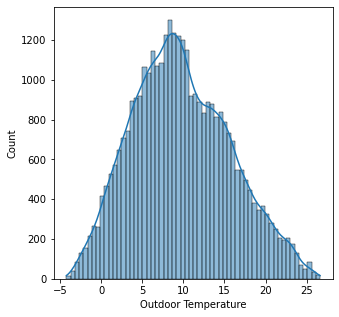

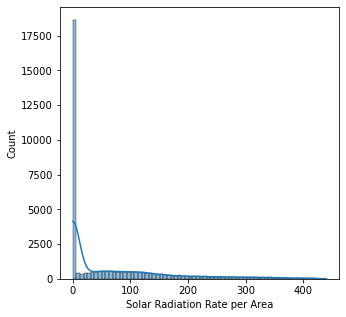

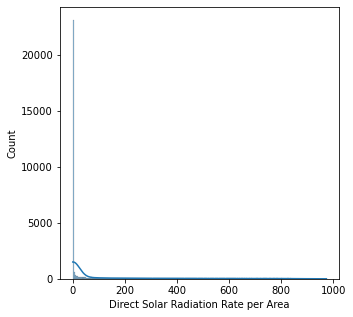

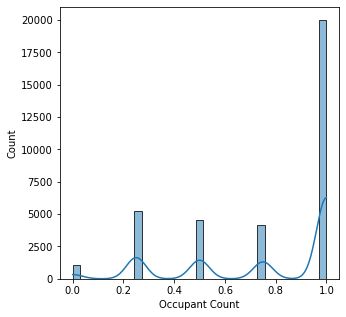

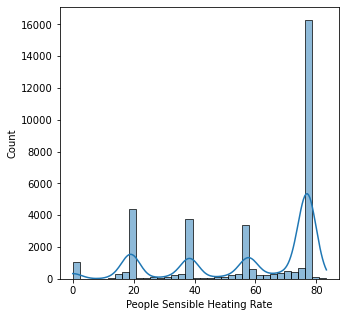

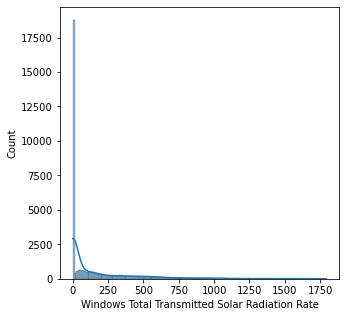

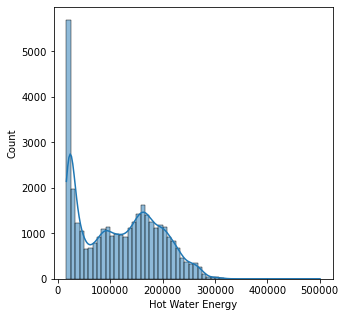

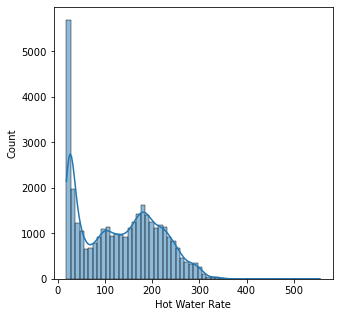

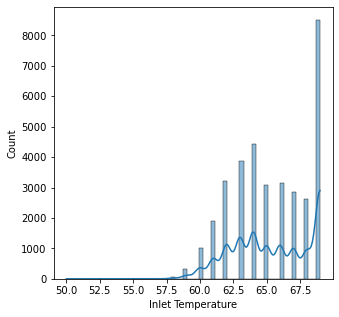

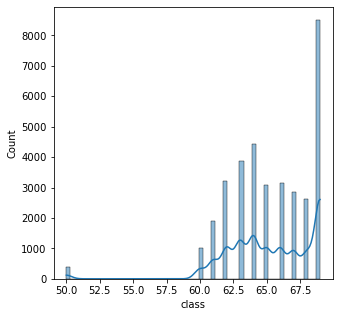

In [46]:
#Dropping the  'Date/Time' and 'Timestamps' for visualization:
data = Data.drop(['Date/Time','Timestamp'],axis = 1)
for i in data.columns:
    plt.figure(figsize=(5,5))
    sns.histplot(data= data[i], kde= True, multiple='stack')
    plt.show()

In [47]:
# Checking correlation between parameters:
data.corr()

,Outdoor Temperature,Solar Radiation Rate per Area,Direct Solar Radiation Rate per Area,Occupant Count,People Sensible Heating Rate,Windows Total Transmitted Solar Radiation Rate,Hot Water Energy,Hot Water Rate,Inlet Temperature,class
Outdoor Temperature,1.000000,0.487246,0.373764,-0.175030,-0.269283,0.436475,-0.915209,-0.915209,0.907640,0.863669
Solar Radiation Rate per Area,0.487246,1.000000,0.443934,-0.379829,-0.395029,0.653559,-0.371611,-0.371611,0.368939,0.342350
Direct Solar Radiation Rate per Area,0.373764,0.443934,1.000000,-0.265090,-0.291969,0.776676,-0.304539,-0.304539,0.300052,0.279326
Occupant Count,-0.175030,-0.379829,-0.265090,1.000000,0.983613,-0.338237,0.040691,0.040691,-0.039730,-0.038324
People Sensible Heating Rate,-0.269283,-0.395029,-0.291969,0.983613,1.000000,-0.362328,0.125016,0.125016,-0.120708,-0.114648
Windows Total Transmitted Solar Radiation Rate,0.436475,0.653559,0.776676,-0.338237,-0.362328,1.000000,-0.361627,-0.361627,0.357880,0.331394
Hot Water Energy,-0.915209,-0.371611,-0.304539,0.040691,0.125016,-0.361627,1.000000,1.000000,-0.995522,-0.953917
Hot Water Rate,-0.915209,-0.371611,-0.304539,0.040691,0.125016,-0.361627,1.000000,1.000000,-0.995522,-0.953917
Inlet Temperature,0.907640,0.368939,0.300052,-0.039730,-0.120708,0.357880,-0.995522,-0.995522,1.000000,0.960453
class,0.863669,0.342350,0.279326,-0.038324,-0.114648,0.331394,-0.953917,-0.953917,0.960453,1.000000


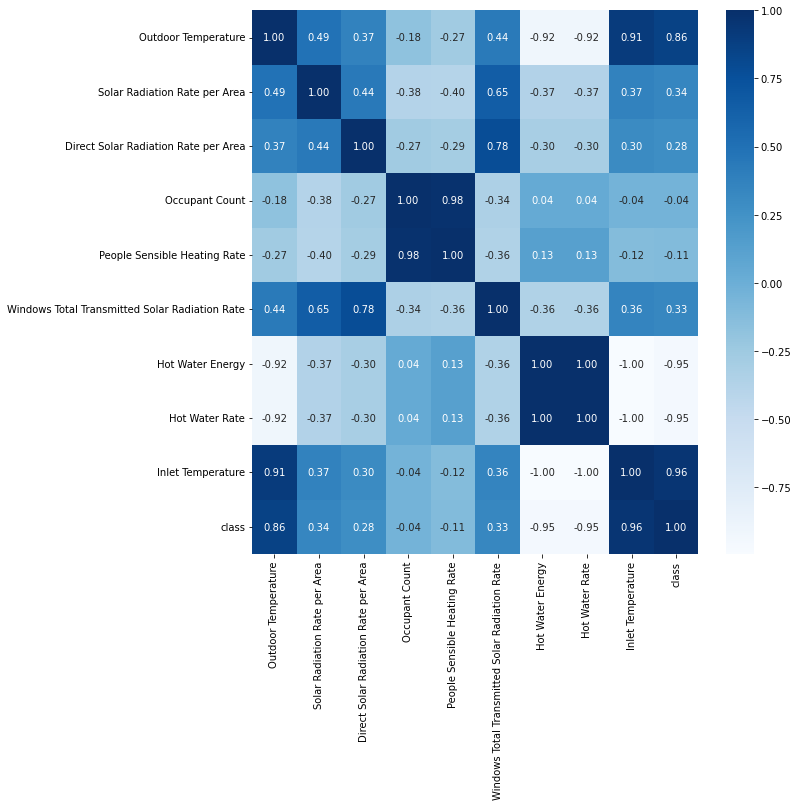

In [48]:
# Visualization of correlation:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(), annot = True, fmt = '.2f',cmap = 'Blues')
plt.show()

### From the heatmap chart it is clearly seen that for predicting the Hot Water Energy, Hot Water Rate and Inlet Temperature the features Occupant count, People Sensible Heating Rate, Solar radiation Rate Per Area, Direct Solar Radiation Rate per Area and Windows Total Transmitted Solar Radiation Rate are not correlated. So, even if we do not consider these features then it will not affect in prediction of the target values.

In [49]:
#Dropping the less correlated values:
Data = Data.drop(['Solar Radiation Rate per Area', 
                  'Direct Solar Radiation Rate per Area',
                  'Occupant Count',
                  'People Sensible Heating Rate',
                  'Windows Total Transmitted Solar Radiation Rate'], axis = 1)

In [50]:
Data

,Date/Time,Outdoor Temperature,Hot Water Energy,Hot Water Rate,Inlet Temperature,class,Timestamp
0,01/01 00:15:00,7.2725,500406.3132,556.007015,50,50,15
1,01/01 00:30:00,6.0650,474024.5772,526.693975,52,50,30
2,01/01 00:45:00,4.8575,365448.8766,406.054307,56,50,45
3,01/01 01:00:00,3.6500,276488.1718,307.209080,59,50,60
4,01/01 01:15:00,3.8375,224995.4725,249.994969,61,61,75
...,...,...,...,...,...,...,...
35035,12/31 23:00:00,2.1400,238868.6237,265.409582,61,61,525540
35036,12/31 23:15:00,2.3300,239238.6102,265.820678,61,61,525555
35037,12/31 23:30:00,2.5200,238473.8181,264.970909,61,61,525570
35038,12/31 23:45:00,2.7100,236891.7890,263.213099,61,61,525585


## Step 5: Train Test Splitting of the data

In [51]:
# Split the dataset into features and targets
X = Data[['Date/Time','Timestamp','Outdoor Temperature','class']]
Y = Data[['Hot Water Energy','Hot Water Rate','Inlet Temperature']]

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y ,test_size = 0.3, random_state = 0)

In [53]:
X_train_new = X_train.drop(['Date/Time'],axis = 1)
X_train_new

,Timestamp,Outdoor Temperature,class
679,10200,6.9100,64
18784,281775,21.5375,69
24093,361410,9.0650,69
19057,285870,25.4150,69
15253,228810,12.1800,67
...,...,...,...
20757,311370,13.9550,69
32103,481560,3.8000,61
30403,456060,5.4900,64
21243,318660,18.0500,69


In [54]:
X_test_new = X_test.drop(['Date/Time'],axis = 1)
X_test_new

,Timestamp,Outdoor Temperature,class
5063,75960,4.6000,63
35039,525600,2.9000,61
22416,336255,19.9900,69
13063,195960,2.8300,63
32985,494790,3.0000,61
...,...,...,...
18952,284295,23.8700,69
34881,523230,-1.1050,50
11455,171840,9.2500,63
13266,199005,9.3925,66


In [55]:
Y_train

,Hot Water Energy,Hot Water Rate,Inlet Temperature
679,167011.16410,185.567960,64
18784,17961.53097,19.957257,69
24093,24698.08195,27.442313,69
19057,18534.69360,20.594104,69
15253,85930.68769,95.478542,67
...,...,...,...
20757,34277.95183,38.086613,69
32103,233371.48430,259.301649,61
30403,151717.61830,168.575131,64
21243,30346.42063,33.718245,69


In [56]:
Y_test

,Hot Water Energy,Hot Water Rate,Inlet Temperature
5063,183529.17760,203.921308,63
35039,237293.21790,263.659131,61
22416,19681.78792,21.868653,69
13063,171645.43320,190.717148,63
32985,227977.02230,253.307803,61
...,...,...,...
18952,17167.66087,19.075179,69
34881,275660.79860,306.289776,59
11455,175346.97260,194.829970,63
13266,113704.64580,126.338495,66


In [57]:
np.shape(X_train_new), np.shape(X_test_new), np.shape(Y_train), np.shape(Y_test)

((24528, 3), (10512, 3), (24528, 3), (10512, 3))

## Step 6: Applying Models

## Model 1: Linear Regression

In [58]:
LR =lm.LinearRegression()
LR.fit(X_train_new,Y_train)

LinearRegression()

In [59]:
LR.coef_

array([[    -0.00786664,  -4376.88581867, -15075.79678128],
       [    -0.00000874,     -4.86320647,    -16.75088531],
       [     0.00000035,      0.14318793,      0.6293663 ]])

In [60]:
results = ms.cross_val_score(LR, X_train_new,Y_train, cv=5)
print(results)
print ("Model Score=", results.mean())

[0.94587664 0.9444346  0.94717534 0.93556997 0.95077178]
Model Score= 0.9447656664728482


In [61]:
Y_Pred1 = LR.predict(X_test_new)
np.set_printoptions(suppress=True)
print(Y_Pred1)

[[176468.41194792    196.07601327     63.13672857]
 [210523.55439628    233.91506044     61.793851  ]
 [ 16605.71087536     18.45078986     69.20879205]
 ...
 [155361.63923546    172.6240436      63.8365157 ]
 [109296.84532666    121.44093925     65.75464144]
 [255270.38395408    283.63375995     60.15532448]]


In [62]:
Error = Y_test - Y_Pred1
print(Error)

       Hot Water Energy  Hot Water Rate  Inlet Temperature
5063        7060.765652        7.845295          -0.136729
35039      26769.663504       29.744071          -0.793851
22416       3076.077045        3.417863          -0.208792
13063     -11626.069581      -12.917855           0.074207
32985      17648.785239       19.609761          -0.797256
...                 ...             ...                ...
18952      17135.516242       19.039462          -0.745956
34881    -118244.592036     -131.382880           4.703485
11455      19985.333365       22.205926          -0.836516
13266       4407.800473        4.897556           0.245359
8554        2902.505946        3.225007          -0.155324

[10512 rows x 3 columns]


In [63]:
results_linear = pd.concat([pd.DataFrame(np.array(Y_test['Hot Water Energy']),columns = ['Test_HWE']), 
                     pd.DataFrame(np.array(Y_test['Hot Water Rate']),columns = ['Test_HWR']),
                     pd.DataFrame(np.array(Y_test['Inlet Temperature']),columns = ['Test_IT']),
                     pd.DataFrame(np.array(Y_Pred1[:,0]),columns = ['Pred_HWE']),
                     pd.DataFrame(np.array(Y_Pred1[:,1]),columns = ['Pred_HWR']),
                     pd.DataFrame(np.array(Y_Pred1[:,2]),columns = ['Pred_IT']),
                     pd.DataFrame(np.array(X_test['Date/Time']),columns = ['Timestamp'])], axis = 1)
results_linear.index = Y_test.index

In [64]:
results_linear = results_linear.sort_index(ascending =True)
results_linear

,Test_HWE,Test_HWR,Test_IT,Pred_HWE,Pred_HWR,Pred_IT,Timestamp
3,276488.1718,307.209080,59,377208.889776,419.120989,54.792052,01/01 01:00:00
4,224995.4725,249.994969,61,210554.341092,233.949268,61.741935,01/01 01:15:00
6,200673.2760,222.970307,62,193836.976129,215.374418,62.425007,01/01 01:45:00
7,199227.9614,221.364402,62,193016.192039,214.462436,62.451860,01/01 02:00:00
17,194915.0642,216.572294,62,184808.351132,205.342612,62.720391,01/01 04:30:00
...,...,...,...,...,...,...,...
35028,243108.7011,270.120779,61,219595.948251,243.995498,61.497036,12/31 21:15:00
35032,241859.3820,268.732647,61,216312.811889,240.347569,61.604448,12/31 22:15:00
35035,238868.6237,265.409582,61,213850.459617,237.611622,61.685007,12/31 23:00:00
35036,239238.6102,265.820678,61,213018.733312,236.687481,61.712218,12/31 23:15:00


In [65]:
results_linear['Timestamp'] = pd.to_datetime(results_linear['Timestamp'], format='%m/%d %H:%M:%S')
results_linear

,Test_HWE,Test_HWR,Test_IT,Pred_HWE,Pred_HWR,Pred_IT,Timestamp
3,276488.1718,307.209080,59,377208.889776,419.120989,54.792052,1900-01-01 01:00:00
4,224995.4725,249.994969,61,210554.341092,233.949268,61.741935,1900-01-01 01:15:00
6,200673.2760,222.970307,62,193836.976129,215.374418,62.425007,1900-01-01 01:45:00
7,199227.9614,221.364402,62,193016.192039,214.462436,62.451860,1900-01-01 02:00:00
17,194915.0642,216.572294,62,184808.351132,205.342612,62.720391,1900-01-01 04:30:00
...,...,...,...,...,...,...,...
35028,243108.7011,270.120779,61,219595.948251,243.995498,61.497036,1900-12-31 21:15:00
35032,241859.3820,268.732647,61,216312.811889,240.347569,61.604448,1900-12-31 22:15:00
35035,238868.6237,265.409582,61,213850.459617,237.611622,61.685007,1900-12-31 23:00:00
35036,239238.6102,265.820678,61,213018.733312,236.687481,61.712218,1900-12-31 23:15:00


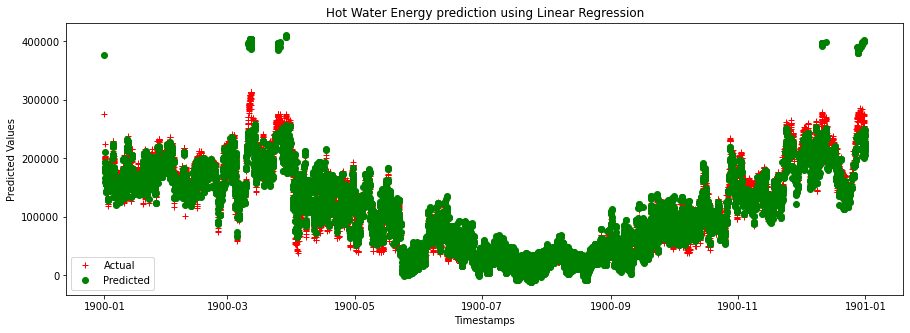

In [66]:
plt.figure(figsize = (15,5))
plt.plot(results_linear['Timestamp'],results_linear['Test_HWE'],'r+', label ='Actual')
plt.plot(results_linear['Timestamp'],results_linear['Pred_HWE'],'go', label ='Predicted')
plt.xlabel('Timestamps')
plt.ylabel('Predicted Values')
plt.title('Hot Water Energy prediction using Linear Regression')
plt.legend()
plt.show()

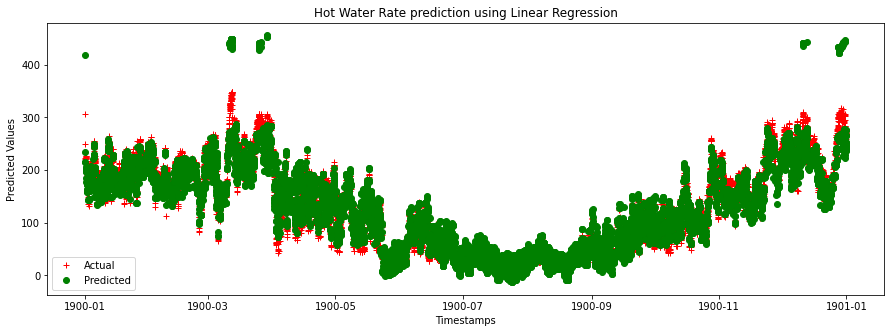

In [67]:
plt.figure(figsize = (15,5))
plt.plot(results_linear['Timestamp'],results_linear['Test_HWR'],'r+', label ='Actual')
plt.plot(results_linear['Timestamp'],results_linear['Pred_HWR'],'go', label ='Predicted')
plt.xlabel('Timestamps')
plt.ylabel('Predicted Values')
plt.title('Hot Water Rate prediction using Linear Regression')
plt.legend()
plt.show()

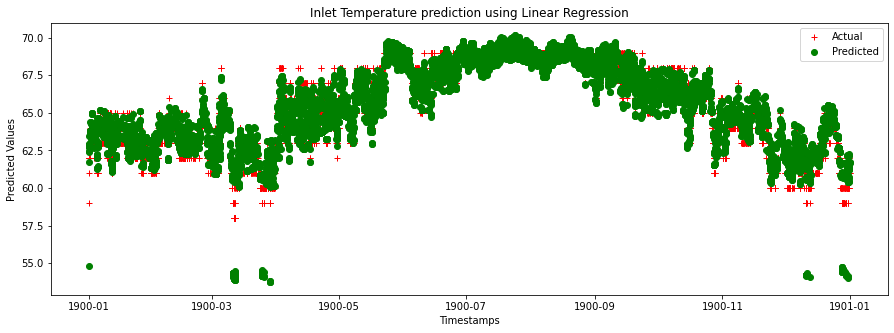

In [68]:
plt.figure(figsize = (15,5))
plt.plot(results_linear['Timestamp'],results_linear['Test_IT'],'r+', label ='Actual')
plt.plot(results_linear['Timestamp'],results_linear['Pred_IT'],'go', label ='Predicted')
plt.xlabel('Timestamps')
plt.ylabel('Predicted Values')
plt.title('Inlet Temperature prediction using Linear Regression')
plt.legend()
plt.show()

## Model 2: Ridge Regression Model

In [69]:
model_ridge = lm.Ridge(alpha = 10)

model_ridge = model_ridge.fit(X_train_new, Y_train)

In [70]:
Y_Pred2 = model_ridge.predict(X_test_new)
Y_Pred2

array([[176468.38949011,    196.07598832,     63.13672734],
       [210521.0351543 ,    233.91226128,     61.79395517],
       [ 16604.03661775,     18.44892958,     69.20886962],
       ...,
       [155357.40180165,    172.61933534,     63.83669864],
       [109298.6349213 ,    121.44292769,     65.75456419],
       [255271.27523127,    283.63475026,     60.15527943]])

In [71]:
results = ms.cross_val_score(model_ridge, X_train_new,Y_train, cv=5)
print (results)
print ("Model Score=", results.mean())

[0.94587555 0.94443558 0.9471735  0.93557651 0.95076819]
Model Score= 0.9447658657974841


In [72]:
Error = Y_test -Y_Pred2
print(Error)

       Hot Water Energy  Hot Water Rate  Inlet Temperature
5063        7060.788110        7.845320          -0.136727
35039      26772.182746       29.746870          -0.793955
22416       3077.751302        3.419724          -0.208870
13063     -11627.672277      -12.919636           0.074280
32985      17651.399483       19.612666          -0.797364
...                 ...             ...                ...
18952      17140.725003       19.045250          -0.746188
34881    -118223.152797     -131.359059           4.702567
11455      19989.570798       22.210634          -0.836699
13266       4406.010879        4.895568           0.245436
8554        2901.614669        3.224016          -0.155279

[10512 rows x 3 columns]


In [73]:
results_Ridge = pd.concat([pd.DataFrame(np.array(Y_test['Hot Water Energy']),columns = ['Test_HWE']), 
                     pd.DataFrame(np.array(Y_test['Hot Water Rate']),columns = ['Test_HWR']),
                     pd.DataFrame(np.array(Y_test['Inlet Temperature']),columns = ['Test_IT']),
                     pd.DataFrame(np.array(Y_Pred2[:,0]),columns = ['Pred_HWE']),
                     pd.DataFrame(np.array(Y_Pred2[:,1]),columns = ['Pred_HWR']),
                     pd.DataFrame(np.array(Y_Pred2[:,2]),columns = ['Pred_IT']),
                     pd.DataFrame(np.array(X_test['Date/Time']),columns = ['Timestamp'])], axis = 1)
results_Ridge.index = Y_test.index

In [74]:
results_Ridge = results_Ridge.sort_index(ascending =True)
results_Ridge

,Test_HWE,Test_HWR,Test_IT,Pred_HWE,Pred_HWR,Pred_IT,Timestamp
3,276488.1718,307.209080,59,377183.058040,419.092287,54.793165,01/01 01:00:00
4,224995.4725,249.994969,61,210550.899834,233.945444,61.742081,01/01 01:15:00
6,200673.2760,222.970307,62,193835.244928,215.372494,62.425080,01/01 01:45:00
7,199227.9614,221.364402,62,193014.290369,214.460323,62.451940,01/01 02:00:00
17,194915.0642,216.572294,62,184804.744770,205.338605,62.720545,01/01 04:30:00
...,...,...,...,...,...,...,...
35028,243108.7011,270.120779,61,219595.313262,243.994793,61.497057,12/31 21:15:00
35032,241859.3820,268.732647,61,216311.495023,240.346106,61.604499,12/31 22:15:00
35035,238868.6237,265.409582,61,213848.631344,237.609590,61.685081,12/31 23:00:00
35036,239238.6102,265.820678,61,213016.732296,236.685258,61.712299,12/31 23:15:00


In [75]:
results_Ridge['Timestamp'] = pd.to_datetime(results_Ridge['Timestamp'], format='%m/%d %H:%M:%S')
results_Ridge

,Test_HWE,Test_HWR,Test_IT,Pred_HWE,Pred_HWR,Pred_IT,Timestamp
3,276488.1718,307.209080,59,377183.058040,419.092287,54.793165,1900-01-01 01:00:00
4,224995.4725,249.994969,61,210550.899834,233.945444,61.742081,1900-01-01 01:15:00
6,200673.2760,222.970307,62,193835.244928,215.372494,62.425080,1900-01-01 01:45:00
7,199227.9614,221.364402,62,193014.290369,214.460323,62.451940,1900-01-01 02:00:00
17,194915.0642,216.572294,62,184804.744770,205.338605,62.720545,1900-01-01 04:30:00
...,...,...,...,...,...,...,...
35028,243108.7011,270.120779,61,219595.313262,243.994793,61.497057,1900-12-31 21:15:00
35032,241859.3820,268.732647,61,216311.495023,240.346106,61.604499,1900-12-31 22:15:00
35035,238868.6237,265.409582,61,213848.631344,237.609590,61.685081,1900-12-31 23:00:00
35036,239238.6102,265.820678,61,213016.732296,236.685258,61.712299,1900-12-31 23:15:00


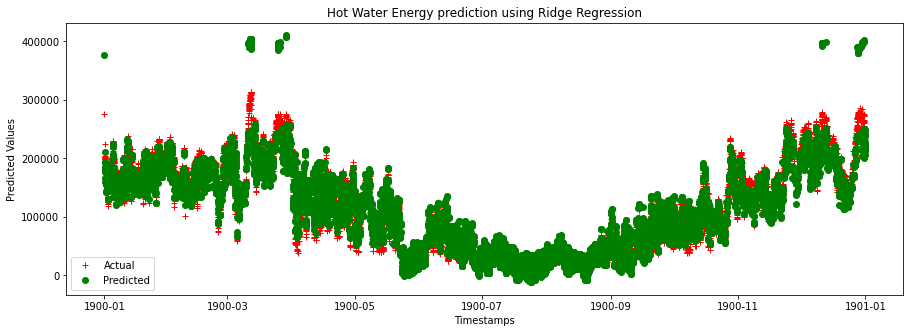

In [76]:
plt.figure(figsize = (15,5))
plt.plot(results_Ridge['Timestamp'],results_Ridge['Test_HWE'],'r+', label = 'Actual')
plt.plot(results_Ridge['Timestamp'],results_Ridge['Pred_HWE'],'go', label ='Predicted')
plt.xlabel('Timestamps')
plt.ylabel('Predicted Values')
plt.title('Hot Water Energy prediction using Ridge Regression')
plt.legend()
plt.show()

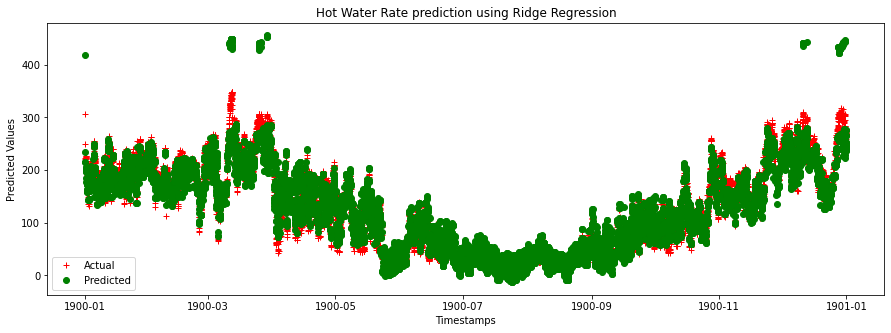

In [77]:
plt.figure(figsize = (15,5))
plt.plot(results_Ridge['Timestamp'],results_Ridge['Test_HWR'],'r+', label ='Actual')
plt.plot(results_Ridge['Timestamp'],results_Ridge['Pred_HWR'],'go', label ='Predicted')
plt.xlabel('Timestamps')
plt.ylabel('Predicted Values')
plt.title('Hot Water Rate prediction using Ridge Regression')
plt.legend()
plt.show()

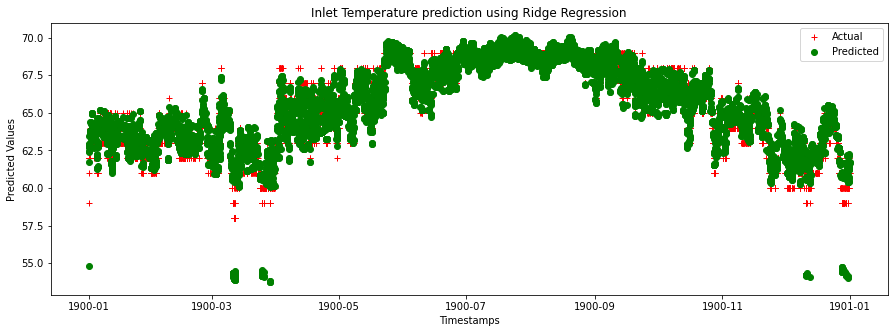

In [78]:
plt.figure(figsize = (15,5))
plt.plot(results_Ridge['Timestamp'],results_Ridge['Test_IT'],'r+', label ='Actual')
plt.plot(results_Ridge['Timestamp'],results_Ridge['Pred_IT'],'go', label ='Predicted')
plt.xlabel('Timestamps')
plt.ylabel('Predicted Values')
plt.title('Inlet Temperature prediction using Ridge Regression')
plt.legend()
plt.show()

## Model 3: Random Forest Regressor

In [79]:
RFR = RandomForestRegressor(random_state=0)
RFR = RFR.fit(X_train_new, Y_train)

RFR_score = RFR.score(X_train_new, Y_train)
print(RFR_score)

0.9998264325382857


In [80]:
Y_Pred3 = RFR.predict(X_test_new)
print(Y_Pred3)

[[184621.263908      205.13473768     63.        ]
 [233317.637223      259.24181914     61.        ]
 [ 19611.0507245      21.79005636     69.        ]
 ...
 [172150.165764      191.27796195     63.        ]
 [106511.2795544     118.34586613     66.        ]
 [255564.784264      283.96087144     60.        ]]


In [81]:
results = ms.cross_val_score(RFR, X_train_new,Y_train, cv=5)
print(results)
print ("Model Score=", results.mean())

[0.9982501  0.99841899 0.99872011 0.99859078 0.9987316 ]
Model Score= 0.998542316856317


In [82]:
Error = Y_test -Y_Pred3
print(Error)

       Hot Water Energy  Hot Water Rate  Inlet Temperature
5063       -1092.086308       -1.213429                0.0
35039       3975.580677        4.417312                0.0
22416         70.737195        0.078597                0.0
13063      -2470.724117       -2.745249                0.0
32985        552.322349        0.613692                0.0
...                 ...             ...                ...
18952       -207.281828       -0.230313                0.0
34881      -1337.388181       -1.485987                0.0
11455       3196.806836        3.552008                0.0
13266       7193.366246        7.992629                0.0
8554        2608.105636        2.897895                0.0

[10512 rows x 3 columns]


In [83]:
results_RFR = pd.concat([pd.DataFrame(np.array(Y_test['Hot Water Energy']),columns = ['Test_HWE']), 
                     pd.DataFrame(np.array(Y_test['Hot Water Rate']),columns = ['Test_HWR']),
                     pd.DataFrame(np.array(Y_test['Inlet Temperature']),columns = ['Test_IT']),
                     pd.DataFrame(np.array(Y_Pred3[:,0]),columns = ['Pred_HWE']),
                     pd.DataFrame(np.array(Y_Pred3[:,1]),columns = ['Pred_HWR']),
                     pd.DataFrame(np.array(Y_Pred3[:,2]),columns = ['Pred_IT']),
                     pd.DataFrame(np.array(X_test['Date/Time']),columns = ['Timestamp'])], axis = 1)
results_RFR.index = Y_test.index

In [84]:
results_RFR = results_RFR.sort_index(ascending =True)
results_RFR

,Test_HWE,Test_HWR,Test_IT,Pred_HWE,Pred_HWR,Pred_IT,Timestamp
3,276488.1718,307.209080,59,362016.224480,402.240249,55.95,01/01 01:00:00
4,224995.4725,249.994969,61,221442.893573,246.047659,61.00,01/01 01:15:00
6,200673.2760,222.970307,62,199693.831281,221.882035,62.00,01/01 01:45:00
7,199227.9614,221.364402,62,200703.416262,223.003796,62.00,01/01 02:00:00
17,194915.0642,216.572294,62,195155.857040,216.839841,62.00,01/01 04:30:00
...,...,...,...,...,...,...,...
35028,243108.7011,270.120779,61,238749.381098,265.277090,61.00,12/31 21:15:00
35032,241859.3820,268.732647,61,240675.581524,267.417313,61.00,12/31 22:15:00
35035,238868.6237,265.409582,61,239223.874049,265.804305,61.00,12/31 23:00:00
35036,239238.6102,265.820678,61,237939.806749,264.377563,61.00,12/31 23:15:00


In [85]:
results_RFR['Timestamp'] = pd.to_datetime(results_RFR['Timestamp'], format='%m/%d %H:%M:%S')
results_RFR

,Test_HWE,Test_HWR,Test_IT,Pred_HWE,Pred_HWR,Pred_IT,Timestamp
3,276488.1718,307.209080,59,362016.224480,402.240249,55.95,1900-01-01 01:00:00
4,224995.4725,249.994969,61,221442.893573,246.047659,61.00,1900-01-01 01:15:00
6,200673.2760,222.970307,62,199693.831281,221.882035,62.00,1900-01-01 01:45:00
7,199227.9614,221.364402,62,200703.416262,223.003796,62.00,1900-01-01 02:00:00
17,194915.0642,216.572294,62,195155.857040,216.839841,62.00,1900-01-01 04:30:00
...,...,...,...,...,...,...,...
35028,243108.7011,270.120779,61,238749.381098,265.277090,61.00,1900-12-31 21:15:00
35032,241859.3820,268.732647,61,240675.581524,267.417313,61.00,1900-12-31 22:15:00
35035,238868.6237,265.409582,61,239223.874049,265.804305,61.00,1900-12-31 23:00:00
35036,239238.6102,265.820678,61,237939.806749,264.377563,61.00,1900-12-31 23:15:00


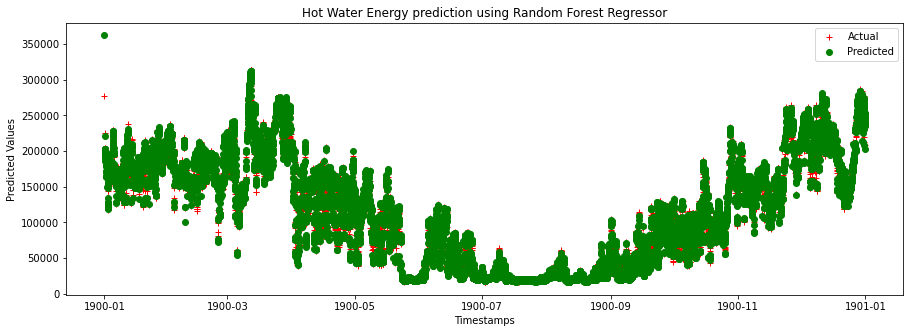

In [86]:
plt.figure(figsize = (15,5))
plt.plot(results_RFR['Timestamp'],results_RFR['Test_HWE'],'r+', label ='Actual')
plt.plot(results_RFR['Timestamp'],results_RFR['Pred_HWE'],'go', label ='Predicted')
plt.xlabel('Timestamps')
plt.ylabel('Predicted Values')
plt.title('Hot Water Energy prediction using Random Forest Regressor')
plt.legend()
plt.show()

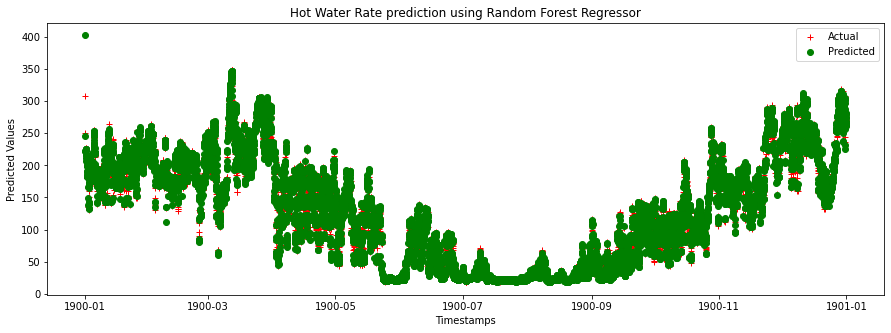

In [87]:
plt.figure(figsize = (15,5))
plt.plot(results_RFR['Timestamp'],results_RFR['Test_HWR'],'r+', label ='Actual')
plt.plot(results_RFR['Timestamp'],results_RFR['Pred_HWR'],'go', label ='Predicted')
plt.xlabel('Timestamps')
plt.ylabel('Predicted Values')
plt.title('Hot Water Rate prediction using Random Forest Regressor')
plt.legend()
plt.show()

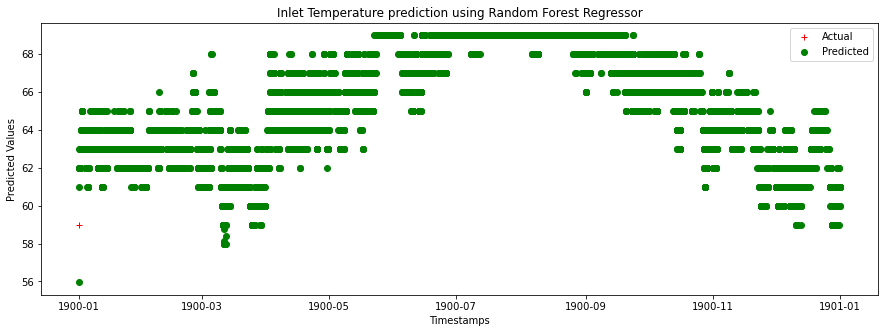

In [88]:
plt.figure(figsize = (15,5))
plt.plot(results_RFR['Timestamp'],results_RFR['Test_IT'],'r+', label ='Actual')
plt.plot(results_RFR['Timestamp'],results_RFR['Pred_IT'],'go', label ='Predicted')
plt.xlabel('Timestamps')
plt.ylabel('Predicted Values')
plt.title('Inlet Temperature prediction using Random Forest Regressor')
plt.legend()
plt.show()

## Model 4: Lasso Regression Model

In [89]:
model_lasso = lm.Lasso(alpha = 10)

model_lasso = model_lasso.fit(X_train_new, Y_train)

In [90]:
Y_Pred4 = model_lasso.predict(X_test_new)
print(Y_Pred4)

[[176467.4210417     195.08506938     64.25814577]
 [210519.01502075    229.37565923     64.88902989]
 [ 16606.36716557     19.10722616     67.03848826]
 ...
 [155357.40182639    168.38675206     65.13200045]
 [109298.63597683    123.23154208     65.20628226]
 [255268.37946084    281.62911853     63.21550974]]


In [91]:
results = ms.cross_val_score(model_lasso, X_train_new,Y_train, cv=5)
print(results)
print ("Model Score=", results.mean())

[0.78734001 0.78574447 0.7869035  0.77708757 0.78930785]
Model Score= 0.7852766782378102


In [92]:
Error = Y_test -Y_Pred4
print(Error)

       Hot Water Energy  Hot Water Rate  Inlet Temperature
5063        7061.756558        8.836239          -1.258146
35039      26774.202879       34.283472          -3.889030
22416       3075.420754        2.761427           1.961512
13063     -11626.111235      -12.959398          -1.232366
32985      17653.351749       24.176290          -3.843369
...                 ...             ...                ...
18952      17137.397511       20.920445           1.491105
34881    -118220.161667     -106.952959          -5.293659
11455      19989.570774       26.443218          -2.132000
13266       4406.009823        3.106953           0.793718
8554        2904.510439        5.229648          -3.215510

[10512 rows x 3 columns]


In [93]:
results_Lasso = pd.concat([pd.DataFrame(np.array(Y_test['Hot Water Energy']),columns = ['Test_HWE']), 
                     pd.DataFrame(np.array(Y_test['Hot Water Rate']),columns = ['Test_HWR']),
                     pd.DataFrame(np.array(Y_test['Inlet Temperature']),columns = ['Test_IT']),
                     pd.DataFrame(np.array(Y_Pred4[:,0]),columns = ['Pred_HWE']),
                     pd.DataFrame(np.array(Y_Pred4[:,1]),columns = ['Pred_HWR']),
                     pd.DataFrame(np.array(Y_Pred4[:,2]),columns = ['Pred_IT']),
                     pd.DataFrame(np.array(X_test['Date/Time']),columns = ['Timestamp'])], axis = 1)
results_Lasso.index = Y_test.index

In [94]:
results_Lasso = results_Lasso.sort_index(ascending =True)
results_Lasso

,Test_HWE,Test_HWR,Test_IT,Pred_HWE,Pred_HWR,Pred_IT,Timestamp
3,276488.1718,307.209080,59,377181.946225,392.178098,63.969204,01/01 01:00:00
4,224995.4725,249.994969,61,210549.854657,229.462887,63.996889,01/01 01:15:00
6,200673.2760,222.970307,62,193834.290883,212.689183,64.052259,01/01 01:45:00
7,199227.9614,221.364402,62,193013.380886,211.651301,64.079944,01/01 02:00:00
17,194915.0642,216.572294,62,184804.280912,201.272475,64.356794,01/01 04:30:00
...,...,...,...,...,...,...,...
35028,243108.7011,270.120779,61,219592.800565,240.847713,64.583020,12/31 21:15:00
35032,241859.3820,268.732647,61,216309.160575,236.696183,64.693760,12/31 22:15:00
35035,238868.6237,265.409582,61,213846.430583,233.582535,64.776815,12/31 23:00:00
35036,239238.6102,265.820678,61,213014.576692,232.530816,64.804869,12/31 23:15:00


In [95]:
results_Lasso['Timestamp'] = pd.to_datetime(results_Lasso['Timestamp'], format='%m/%d %H:%M:%S')
results_Lasso

,Test_HWE,Test_HWR,Test_IT,Pred_HWE,Pred_HWR,Pred_IT,Timestamp
3,276488.1718,307.209080,59,377181.946225,392.178098,63.969204,1900-01-01 01:00:00
4,224995.4725,249.994969,61,210549.854657,229.462887,63.996889,1900-01-01 01:15:00
6,200673.2760,222.970307,62,193834.290883,212.689183,64.052259,1900-01-01 01:45:00
7,199227.9614,221.364402,62,193013.380886,211.651301,64.079944,1900-01-01 02:00:00
17,194915.0642,216.572294,62,184804.280912,201.272475,64.356794,1900-01-01 04:30:00
...,...,...,...,...,...,...,...
35028,243108.7011,270.120779,61,219592.800565,240.847713,64.583020,1900-12-31 21:15:00
35032,241859.3820,268.732647,61,216309.160575,236.696183,64.693760,1900-12-31 22:15:00
35035,238868.6237,265.409582,61,213846.430583,233.582535,64.776815,1900-12-31 23:00:00
35036,239238.6102,265.820678,61,213014.576692,232.530816,64.804869,1900-12-31 23:15:00


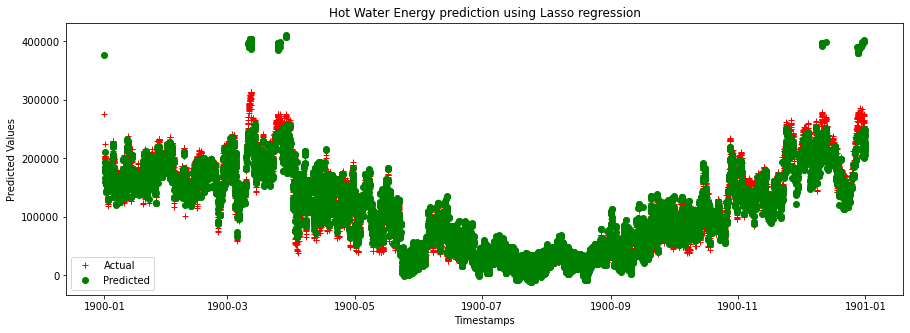

In [96]:
plt.figure(figsize = (15,5))
plt.plot(results_Lasso['Timestamp'],results_Lasso['Test_HWE'],'r+', label ='Actual')
plt.plot(results_Lasso['Timestamp'],results_Lasso['Pred_HWE'],'go', label ='Predicted')
plt.xlabel('Timestamps')
plt.ylabel('Predicted Values')
plt.title('Hot Water Energy prediction using Lasso regression')
plt.legend()
plt.show()

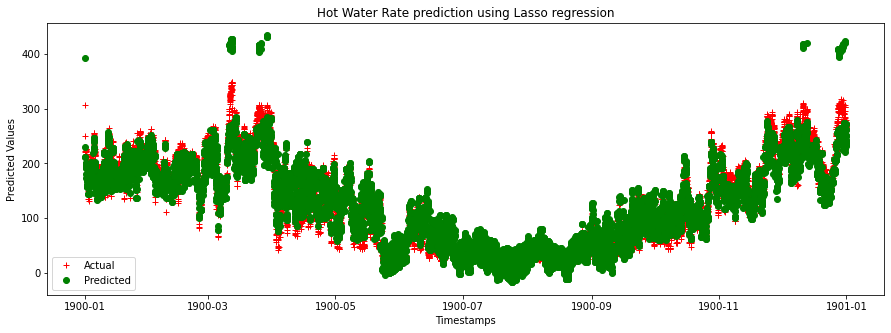

In [97]:
plt.figure(figsize = (15,5))
plt.plot(results_Lasso['Timestamp'],results_Lasso['Test_HWR'],'r+', label ='Actual')
plt.plot(results_Lasso['Timestamp'],results_Lasso['Pred_HWR'],'go', label ='Predicted')
plt.xlabel('Timestamps')
plt.ylabel('Predicted Values')
plt.title('Hot Water Rate prediction using Lasso regression')
plt.legend()
plt.show()

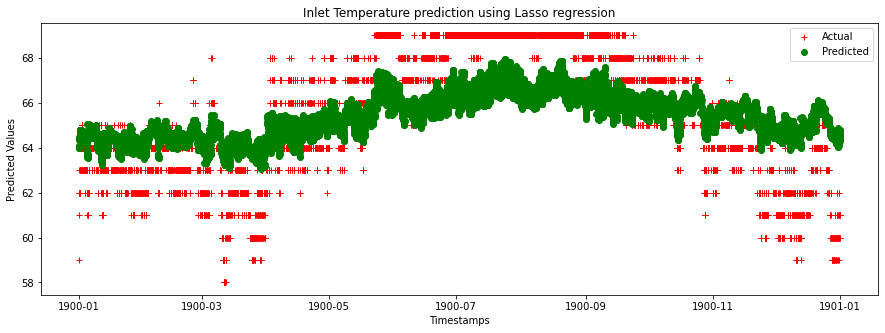

In [98]:
plt.figure(figsize = (15,5))
plt.plot(results_Lasso['Timestamp'],results_Lasso['Test_IT'],'r+', label ='Actual')
plt.plot(results_Lasso['Timestamp'],results_Lasso['Pred_IT'],'go', label ='Predicted')
plt.xlabel('Timestamps')
plt.ylabel('Predicted Values')
plt.title('Inlet Temperature prediction using Lasso regression')
plt.legend()
plt.show()

## Model 5: Arificial Nueral Network (ANN)

In [104]:
# Define the model Architecture:
ann_model = Sequential()
ann_model.add(Dense(150, input_dim=X_train_new.shape[1], activation='linear', kernel_regularizer=l2(0.01)))
ann_model.add(Dropout(0.2))
ann_model.add(Dense(50, activation='linear', kernel_regularizer=l2(0.01)))
ann_model.add(Dropout(0.2))
ann_model.add(Dense(3, activation='linear', kernel_regularizer=l2(0.01)))
ann_model.add(Dropout(0.1))

In [105]:
# print the model summary:
print(ann_model.summary())

Model: "sequential_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_216 (Dense)           (None, 150)               600       
                                                                 
 dropout_216 (Dropout)       (None, 150)               0         
                                                                 
 dense_217 (Dense)           (None, 50)                7550      
                                                                 
 dropout_217 (Dropout)       (None, 50)                0         
                                                                 
 dense_218 (Dense)           (None, 3)                 153       
                                                                 
 dropout_218 (Dropout)       (None, 3)                 0         
                                                                 
Total params: 8,303
Trainable params: 8,303
Non-train

In [106]:
# Compile the model:
ann_model.compile(loss='mse', optimizer='adam' , metrics = ['accuracy'])

In [107]:
# Train the model:
history = ann_model.fit(X_train_new, Y_train, epochs=100, batch_size=150, validation_split = 0.2 , verbose=1)

Epoch 1/100
131/131 [==============================] - 3s 10ms/step - loss: 4607911424.0000 - accuracy: 0.9036 - val_loss: 3413473536.0000 - val_accuracy: 1.0000
Epoch 2/100
131/131 [==============================] - 1s 8ms/step - loss: 3974248960.0000 - accuracy: 0.9309 - val_loss: 3418500352.0000 - val_accuracy: 1.0000
Epoch 3/100
131/131 [==============================] - 1s 8ms/step - loss: 3835709696.0000 - accuracy: 0.9328 - val_loss: 3381544448.0000 - val_accuracy: 1.0000
Epoch 4/100
131/131 [==============================] - 1s 9ms/step - loss: 3810850304.0000 - accuracy: 0.9312 - val_loss: 3347714304.0000 - val_accuracy: 1.0000
Epoch 5/100
131/131 [==============================] - 1s 8ms/step - loss: 3780751872.0000 - accuracy: 0.9320 - val_loss: 3352137216.0000 - val_accuracy: 1.0000
Epoch 6/100
131/131 [==============================] - 1s 8ms/step - loss: 3754933248.0000 - accuracy: 0.9329 - val_loss: 3340820992.0000 - val_accuracy: 1.0000
Epoch 7/100
131/131 [============

131/131 [==============================] - 1s 7ms/step - loss: 1536402048.0000 - accuracy: 0.9171 - val_loss: 924495872.0000 - val_accuracy: 1.0000
Epoch 52/100
131/131 [==============================] - 1s 6ms/step - loss: 1640742656.0000 - accuracy: 0.9119 - val_loss: 870596800.0000 - val_accuracy: 1.0000
Epoch 53/100
131/131 [==============================] - 1s 6ms/step - loss: 1449305344.0000 - accuracy: 0.9188 - val_loss: 931350592.0000 - val_accuracy: 0.9955
Epoch 54/100
131/131 [==============================] - 1s 6ms/step - loss: 1469082624.0000 - accuracy: 0.9121 - val_loss: 1160367104.0000 - val_accuracy: 0.9755
Epoch 55/100
131/131 [==============================] - 1s 7ms/step - loss: 1377479424.0000 - accuracy: 0.9138 - val_loss: 683666176.0000 - val_accuracy: 0.9996
Epoch 56/100
131/131 [==============================] - 1s 6ms/step - loss: 1361374336.0000 - accuracy: 0.9046 - val_loss: 706979456.0000 - val_accuracy: 1.0000
Epoch 57/100
131/131 [========================

In [108]:
# Evaluate the model:
accuracy = ann_model.evaluate(X_test_new, Y_test)
print('Accuracy :', accuracy)

329/329 [==============================] - 1s 2ms/step - loss: 460951360.0000 - accuracy: 0.9623
Accuracy : [460951360.0, 0.9623287916183472]


In [109]:
Y_Pred5 = ann_model.predict(X_test_new)
print(Y_Pred5)

329/329 [==============================] - 1s 2ms/step
[[157172.22        178.65813      56.002464]
 [184448.77        209.3031       89.3075  ]
 [ 14488.413        16.485704     20.275208]
 ...
 [108851.945       123.729004     44.445763]
 [117731.03        133.7957       48.74141 ]
 [235308.3         267.32812      85.859474]]


In [110]:
Error = Y_test -Y_Pred5
print(Error)

       Hot Water Energy  Hot Water Rate  Inlet Temperature
5063       26356.958850       25.263182           6.997536
35039      52844.452275       54.356030         -28.307503
22416       5193.374834        5.382949          48.724792
13063      -9080.863675      -14.597809          -7.456566
32985      45651.522300       46.393420         -25.946907
...                 ...             ...                ...
18952      47350.207745       53.269999          66.846605
34881      82005.595475       86.550976         -34.073090
11455      66495.027288       71.100966          18.554237
13266      -4026.385450       -7.457205          17.258591
8554       22864.593025       19.530642         -25.859474

[10512 rows x 3 columns]


In [111]:
results_ANN = pd.concat([pd.DataFrame(np.array(Y_test['Hot Water Energy']),columns = ['Test_HWE']), 
                     pd.DataFrame(np.array(Y_test['Hot Water Rate']),columns = ['Test_HWR']),
                     pd.DataFrame(np.array(Y_test['Inlet Temperature']),columns = ['Test_IT']),
                     pd.DataFrame(np.array(Y_Pred5[:,0]),columns = ['Pred_HWE']),
                     pd.DataFrame(np.array(Y_Pred5[:,1]),columns = ['Pred_HWR']),
                     pd.DataFrame(np.array(Y_Pred5[:,2]),columns = ['Pred_IT']),
                     pd.DataFrame(np.array(X_test['Date/Time']),columns = ['Timestamp'])], axis = 1)
results_ANN.index = Y_test.index

In [112]:
results_ANN = results_ANN.sort_index(ascending =True)
results_ANN

,Test_HWE,Test_HWR,Test_IT,Pred_HWE,Pred_HWR,Pred_IT,Timestamp
3,276488.1718,307.209080,59,123756.398438,140.751205,41.341610,01/01 01:00:00
4,224995.4725,249.994969,61,156737.625000,178.215363,51.969868,01/01 01:15:00
6,200673.2760,222.970307,62,155773.796875,177.122726,51.574055,01/01 01:45:00
7,199227.9614,221.364402,62,153698.390625,174.766357,50.860634,01/01 02:00:00
17,194915.0642,216.572294,62,132944.296875,151.202957,43.726276,01/01 04:30:00
...,...,...,...,...,...,...,...
35028,243108.7011,270.120779,61,207388.937500,235.348526,97.193390,12/31 21:15:00
35032,241859.3820,268.732647,61,199087.328125,225.923203,94.339661,12/31 22:15:00
35035,238868.6237,265.409582,61,192861.125000,218.854156,92.199356,12/31 23:00:00
35036,239238.6102,265.820678,61,190757.984375,216.466400,91.476372,12/31 23:15:00


In [113]:
results_ANN['Timestamp'] = pd.to_datetime(results_ANN['Timestamp'], format='%m/%d %H:%M:%S')
results_ANN

,Test_HWE,Test_HWR,Test_IT,Pred_HWE,Pred_HWR,Pred_IT,Timestamp
3,276488.1718,307.209080,59,123756.398438,140.751205,41.341610,1900-01-01 01:00:00
4,224995.4725,249.994969,61,156737.625000,178.215363,51.969868,1900-01-01 01:15:00
6,200673.2760,222.970307,62,155773.796875,177.122726,51.574055,1900-01-01 01:45:00
7,199227.9614,221.364402,62,153698.390625,174.766357,50.860634,1900-01-01 02:00:00
17,194915.0642,216.572294,62,132944.296875,151.202957,43.726276,1900-01-01 04:30:00
...,...,...,...,...,...,...,...
35028,243108.7011,270.120779,61,207388.937500,235.348526,97.193390,1900-12-31 21:15:00
35032,241859.3820,268.732647,61,199087.328125,225.923203,94.339661,1900-12-31 22:15:00
35035,238868.6237,265.409582,61,192861.125000,218.854156,92.199356,1900-12-31 23:00:00
35036,239238.6102,265.820678,61,190757.984375,216.466400,91.476372,1900-12-31 23:15:00


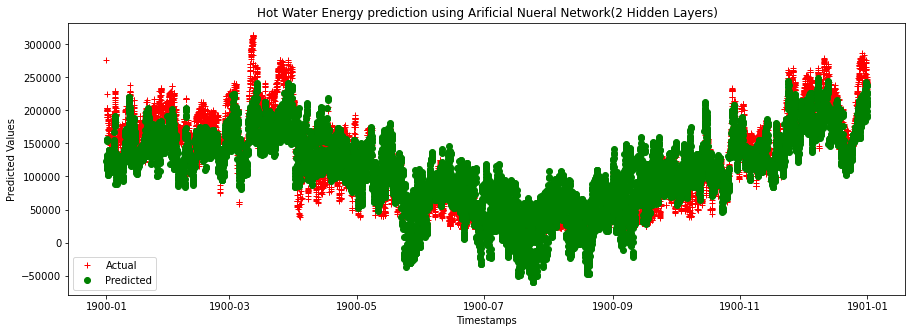

In [114]:
plt.figure(figsize = (15,5))
plt.plot(results_ANN['Timestamp'],results_ANN['Test_HWE'],'r+', label ='Actual')
plt.plot(results_ANN['Timestamp'],results_ANN['Pred_HWE'],'go',label ='Predicted')
plt.xlabel('Timestamps')
plt.ylabel('Predicted Values')
plt.title('Hot Water Energy prediction using Arificial Nueral Network(2 Hidden Layers)')
plt.legend()
plt.show()

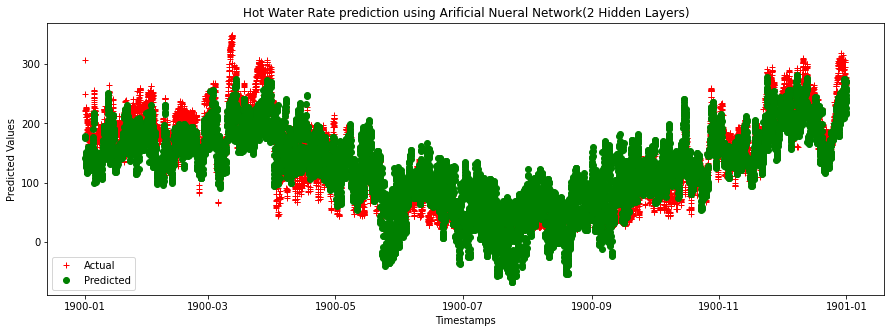

In [115]:
plt.figure(figsize = (15,5))
plt.plot(results_ANN['Timestamp'],results_ANN['Test_HWR'],'r+',label ='Actual')
plt.plot(results_ANN['Timestamp'],results_ANN['Pred_HWR'],'go',label ='Predicted')
plt.xlabel('Timestamps')
plt.ylabel('Predicted Values')
plt.title('Hot Water Rate prediction using Arificial Nueral Network(2 Hidden Layers)')
plt.legend()
plt.show()

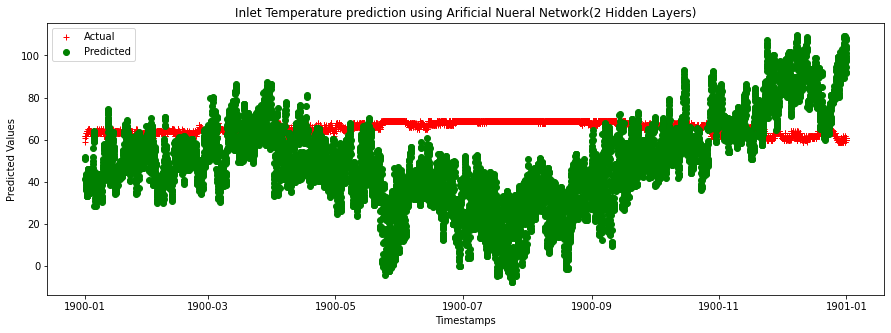

In [116]:
plt.figure(figsize = (15,5))
plt.plot(results_ANN['Timestamp'],results_ANN['Test_IT'],'r+',label ='Actual')
plt.plot(results_ANN['Timestamp'],results_ANN['Pred_IT'],'go',label ='Predicted')
plt.xlabel('Timestamps')
plt.ylabel('Predicted Values')
plt.title('Inlet Temperature prediction using Arificial Nueral Network(2 Hidden Layers)')
plt.legend()
plt.show()